In [1]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import pyCalc as p
import random
import math

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

X_train = np.vstack([img.reshape(-1,) for img in mnist.train.images])


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import pyCalc as p
import random

np.random.seed(1)

p.setMode("loud")

xs = p.constant(X_train[:54000,:]) #54000x784
X_test = X_train[-100:,:]
del X_train
y_train = mnist.train.labels[:54000]
y_train = [[1 if n == i else 0 for n in range(10)] for i in y_train]
Y_test = mnist.train.labels[-100:]
Y_test = [[1 if n == i else 0 for n in range(10)] for i in Y_test]
ys = p.constant(np.array(y_train, dtype=float)) #54000x10
del y_train
del mnist

In [4]:
weights =2*np.random.random((784,10)) - 1
ws = p.var("independent", 784,10)

l0 = p.function(xs, ws, "*") #54000x10
l1 = p.function(l0, "softmax") #54000x10

          rows 784 colss 10
          valid
          output will be 54000 x 10
          output will be 54000 x 10


In [5]:
p.function(l0, "softmax_r").value(dict([(ws,weights)]))[0]

          output will be 54000 x 10


array([ 0.08979221,  0.08979221,  0.        ,  0.        ,  0.08979221,
        0.        ,  0.08979221,  0.08979221,  0.        ,  0.08979221])

In [6]:
cost = p.function(ys, p.function(l1, "ln"), "elementwise*")
l1_error = p.function(ys, l1, "elementwise/") #54000x10
l1_delta = p.function(l1_error, p.function(l0, "softmax_r"), "elementwise*") #54000x10
tmp = p.function(xs.T(), l1_delta, "*") #784x10

          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          output will be 54000 x 10
          trans
          output will be 784 x 54000
          valid
          output will be 784 x 10


Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise* >left is a 54000x10 matrix but right is a 54000x10 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise/ >left is a 54000x10 matrix but right is a 54000x10 matrix
Exception ignored in: 'pyCalc.cError'
ValueError: <invalid operation: elementwise* >left is a 54000x10 matrix but right is a 54000x10 matrix


In [7]:
def acc():
    out = 0
    yss = ys.value().tolist()
    y_ = l1.value(dict([(ws,weights)])).tolist()
    for i in range(len(ys.value())):
        if yss[i].index(max(yss[i])) == y_[i].index(max(y_[i])):
            out +=1

    print(out/ len(ys.value()))

In [8]:
g = []
for i in range(200):
    weights = weights + 0.001 * tmp.value(dict([(ws,weights)]))
    g.append(sum([sum([-bb for bb in d]) for d in cost.value(dict([(ws,weights)])).tolist()]))
    if (i+1)%10 ==0:
        acc()
        print("that's after ", i+1)


0.10061111111111111
that's after  1
0.10151851851851852
that's after  11
0.10142592592592592
that's after  21
0.1020925925925926
that's after  31
0.10225925925925926
that's after  41
0.10275925925925926
that's after  51
0.10368518518518519
that's after  61
0.10444444444444445
that's after  71
0.10492592592592592
that's after  81
0.10538888888888889
that's after  91
0.1058888888888889
that's after  101
0.1062037037037037
that's after  111
0.10701851851851851
that's after  121
0.10727777777777778
that's after  131
0.10757407407407407
that's after  141
0.10801851851851851
that's after  151
0.10827777777777778
that's after  161
0.10864814814814815
that's after  171
0.10912962962962963
that's after  181
0.10940740740740741
that's after  191


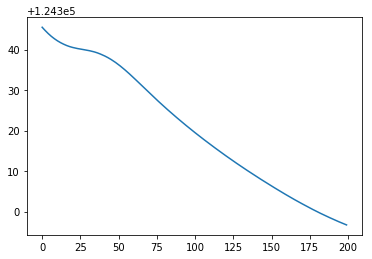

In [9]:
import matplotlib.pyplot as plt

plt.plot(g)

plt.show()